Name: Priyadharshini R
Roll No: 24BAD092


/tmp/ipython-input-3865232431.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)


Linear Regression Performance
MSE : 6.2214468826180624
RMSE: 2.4942828393384064
R²  : 0.6492792001567064

Ridge Regression R²: 0.649279200458081
Lasso Regression R²: 0.6492263454624063


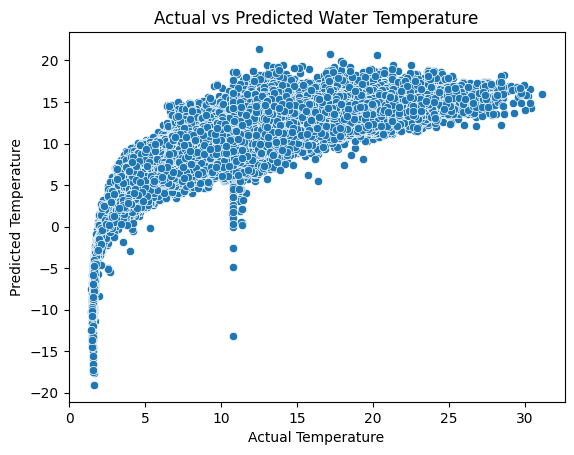

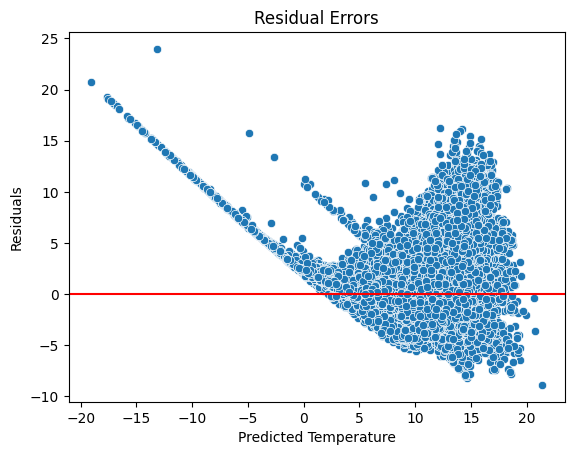

In [8]:
print("Name: Priyadharshini R")
print("Roll No: 24BAD092")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load CalCOFI bottle dataset
data = pd.read_csv(
    r"/content/bottle.csv.zip",
    low_memory=False
)

features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'

df = data[features + [target]]

# Handle missing values
df.fillna(df.mean(), inplace=True)

X = df[features]
y = df[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance")
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("\nRidge Regression R²:", r2_score(y_test, ridge_pred))

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso Regression R²:", r2_score(y_test, lasso_pred))
# Actual vs Predicted
plt.figure()
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Water Temperature")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure()
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Temperature")
plt.ylabel("Residuals")
plt.title("Residual Errors")
plt.show()




Name: Priyadharshini R
Roll No: 24BAD092
Accuracy : 0.6132971506105834
Precision: 1.0
Recall   : 0.030612244897959183
F1-Score : 0.0594059405940594


/tmp/ipython-input-4006434788.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


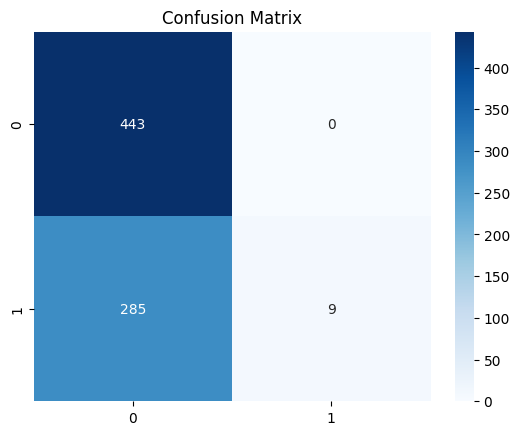

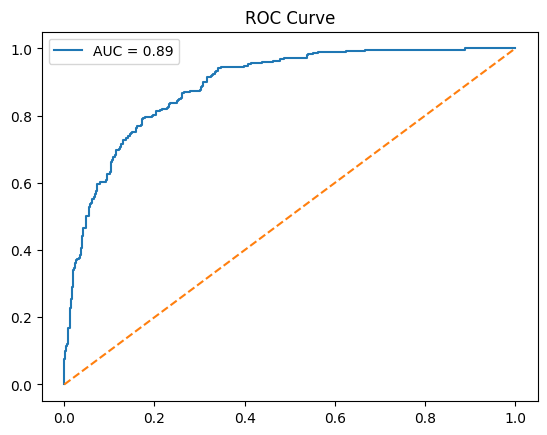

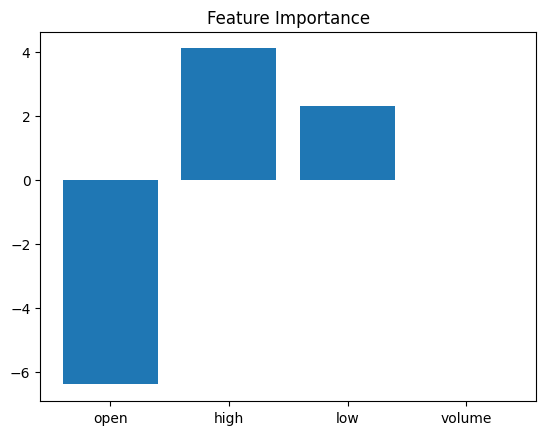

In [7]:
print("Name: Priyadharshini R")
print("Roll No: 24BAD092")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)

# Load dataset
data = pd.read_csv(
    r"/content/LICI - 10 minute data.csv"
)

# Column detection
open_col  = [c for c in data.columns if 'open' in c.lower()][0]
high_col  = [c for c in data.columns if 'high' in c.lower()][0]
low_col   = [c for c in data.columns if 'low' in c.lower()][0]
close_col = [c for c in data.columns if 'close' in c.lower() or 'ltp' in c.lower()][0]
vol_col   = [c for c in data.columns if 'vol' in c.lower()][0]

# Target variable
data["Price_Movement"] = np.where(
    data[close_col] > data[open_col], 1, 0
)

# Features & target
features = [open_col, high_col, low_col, vol_col]
X = data[features]
y = data["Price_Movement"]

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature Importance
plt.bar(features, model.coef_[0])
plt.title("Feature Importance")
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
